# Projeto de Desenvolvimento - CCF 425
---
## O Brasil em Dados: Análise acerca do sentimento de eleitores em relação a possíveis candidatos a presidência por meio de tweets

### Alunos:
- Eduardo Torres Tristão (4219)
- Guilherme Corrêa Melos (3882)
- Luís Henrique Carvalho (4254)
- Vinicius Júlio Barbosa (3495)

---

Definido o tema para o projeto e as perguntas a serem respondidas, deu-se início então a parte de coleta de dados a partir da API do twitter. Para essa coleta, foi necessário acessar o servidor do twitter por meio de tokens gerados a partir da criação de conta para realizar essa coleta. Utilizando a biblioteca tweepy, foram extraídas informações de tweets sobre 12 diferentes pré-candidatos a presidência da república.  

Desse modo, para cada candidato foram gerados dados relativos a tweets contendo comentários positivos (honesto, inteligente, correto etc.), negativos (corrupto, fascista, machista etc.) e palavras chave relativas a temas políticos (reforma agrária, corrupção etc.) no período entre os dias 10/06/2022 e 17/06/2022. Esses dados foram então armazenados em arquivos de formato .csv para manipulação e extração de informações por meio da biblioteca pandas.

Por meio da biblioteca seaborn, foram gerados então gráficos para uma análise visual dessas informações coletadas. Para uma melhor visualização, alguns gráficos gerados foram configurados para escala logaritmica.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action = 'ignore')

In [2]:
# Carregando dados
import glob

def df_all_folder(path, local=False):
    if local:
        all_files = glob.glob(path + "*_tweets_locais.csv")
    else:
        all_files = glob.glob(path + "*_por_tema_tweets.csv")
    if len(all_files) == 0:
        all_files = glob.glob(path + "*_tweets.csv")
    li = []    
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace("_por_tema_tweets.csv", "")
        x = x.replace("dados/ultimos_7_dias\\", "")
        x = x.replace("dados/ultimos_7_dias/pos\\", "")
        x = x.replace("dados/ultimos_7_dias/neg\\", "")
        x = x.replace("_tweets.csv", "")
        x = x.replace("_tweets_locais.csv", "")
        x = x.replace("dados/ultimos_100_tweets\\", "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [3]:
path = "dados/ultimos_7_dias/"
df = df_all_folder(path)
df = df.rename(columns={'level_1': "data"})

In [4]:
df

,candidato,data,ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
0,bivar,2022-06-10T21:40:36.000Z,0,0,0,0,0,0
1,bivar,2022-06-11T00:00:00.000Z,0,0,0,0,2,0
2,bivar,2022-06-12T00:00:00.000Z,0,0,0,0,0,0
3,bivar,2022-06-13T00:00:00.000Z,0,0,0,0,5,0
4,bivar,2022-06-14T00:00:00.000Z,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...
91,vera_lucia,2022-06-13T00:00:00.000Z,0,0,0,0,0,0
92,vera_lucia,2022-06-14T00:00:00.000Z,0,0,0,0,0,0
93,vera_lucia,2022-06-15T00:00:00.000Z,0,0,0,0,0,0
94,vera_lucia,2022-06-16T00:00:00.000Z,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   candidato            96 non-null     object
 1   data                 96 non-null     object
 2   ditadura             96 non-null     int64 
 3   reforma trabalhista  96 non-null     int64 
 4   feminismo            96 non-null     int64 
 5   reforma agrária      96 non-null     int64 
 6   corrupção            96 non-null     int64 
 7   segurança            96 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ KB


## Análise de menções Candidato

### Tópico

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_barplot(df, column, theme):
    df = df.groupby(column)[theme].sum().sort_values(ascending = False)
    g = sns.barplot(x = np.log(df.values), y = df.index, orient ='h', palette = "inferno")
    plt.title("Candidado x frequência de menções sobre {}".format(theme))
    plt.xlabel("{}".format(theme.title()))
    plt.ylabel("Candidato")
    plt.show()
                                                            


In [7]:
import matplotlib.pyplot as plt

def generate_barplots_by_topic(df, topic):
    topics = df.columns
    path = 'images/candidatos_por_topico_bar/'
    for x in topics:
        if x != "candidato" and x != 'data':
            create_barplot(df, topic, x)

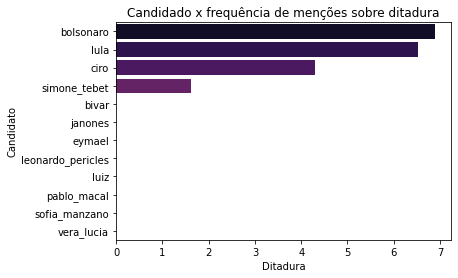

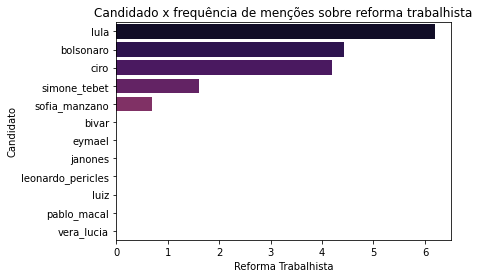

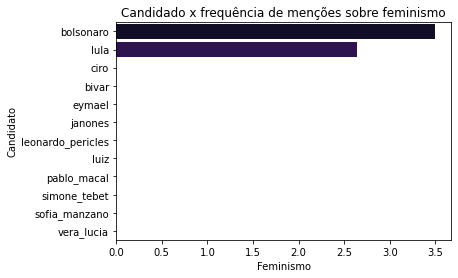

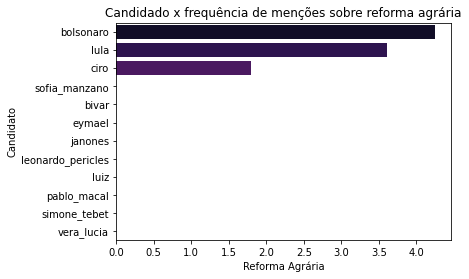

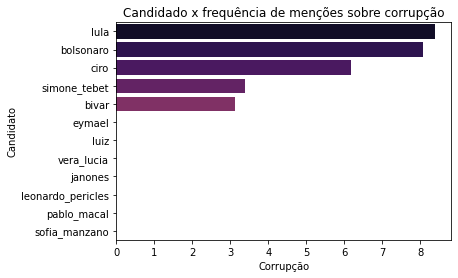

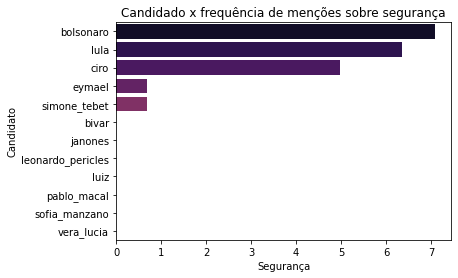

In [8]:
generate_barplots_by_topic(df, "candidato")

---

Observando os gráficos gerados, é perceptível a ausência de tweets relativos a candidatos de partidos menores na maioria dos temas como Leonardo Péricles, Vera Lucia entre outros. Em contrapartida, candidatos como Jair Bolsonaro, Lula e Ciro aparecem em grande parte das menções relativas a esses temas.

---

### Comentários positivos

In [9]:
df = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

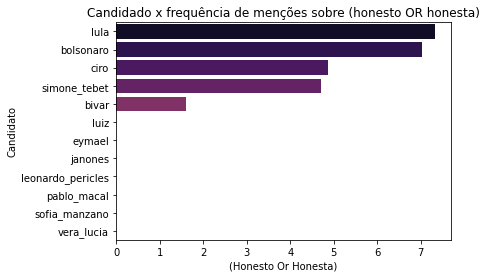

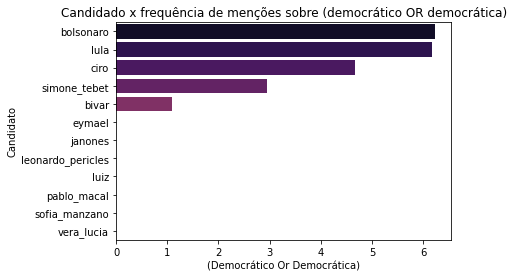

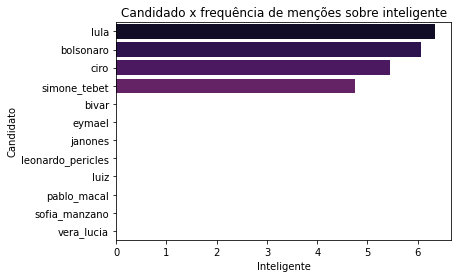

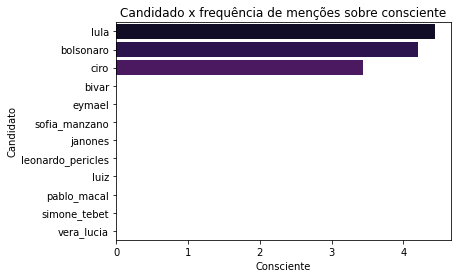

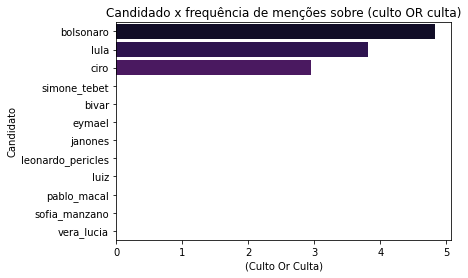

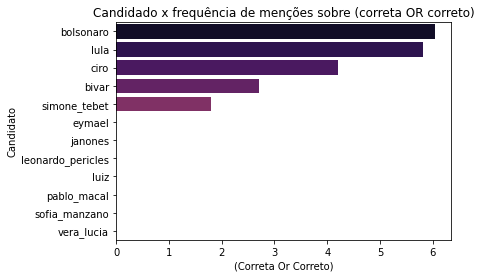

In [10]:
generate_barplots_by_topic(df, "candidato")

---

Sobre os comentários positivos, alguns candidatos como Simone Tebet e Luciano Bivar apareceram com maior frequência além dos candidatos de maior popularidade (Bolsonaro, Lula e Ciro).

---

### Comentários negativos

In [11]:
df = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

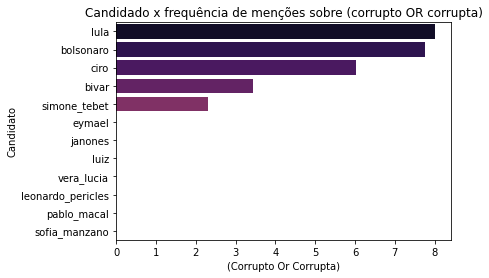

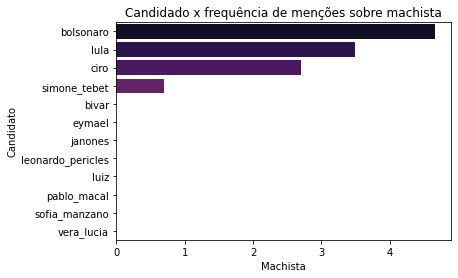

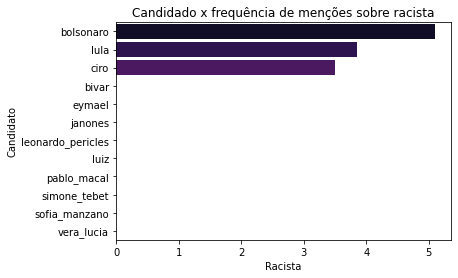

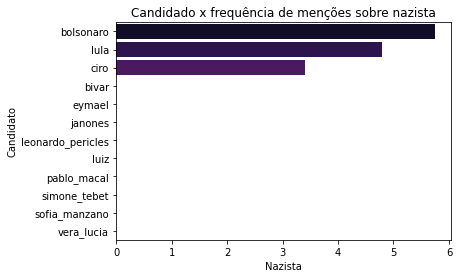

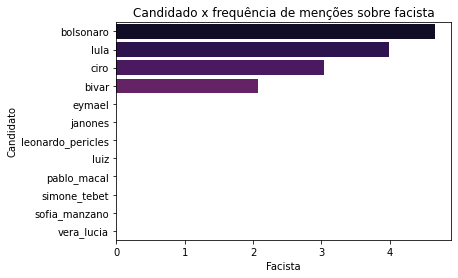

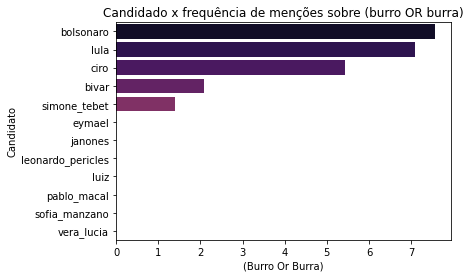

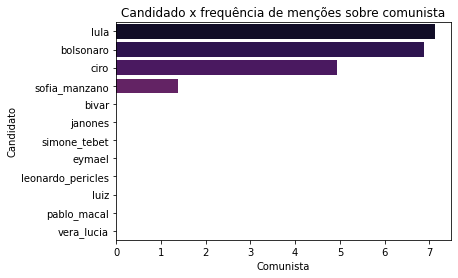

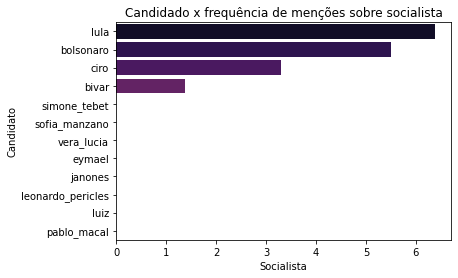

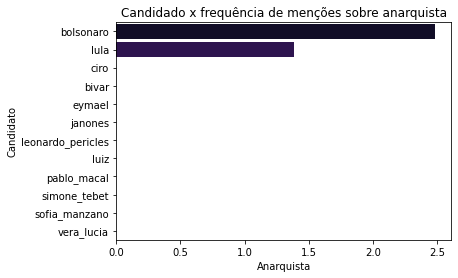

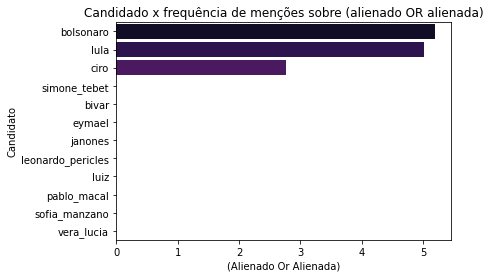

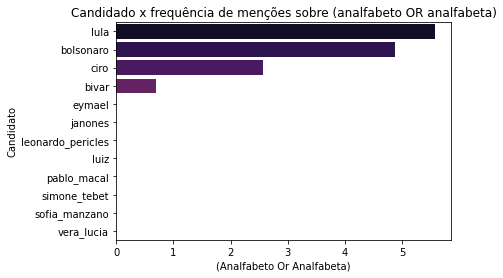

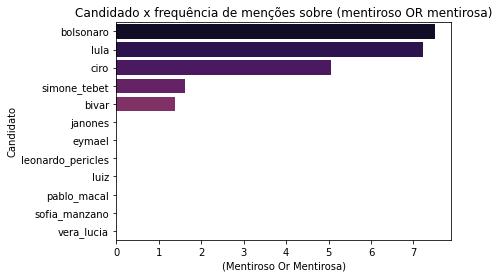

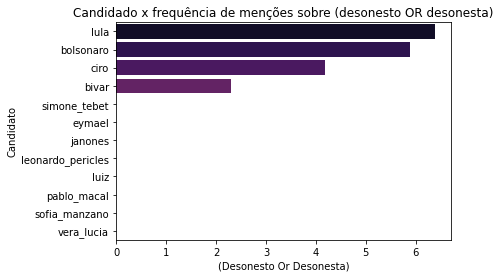

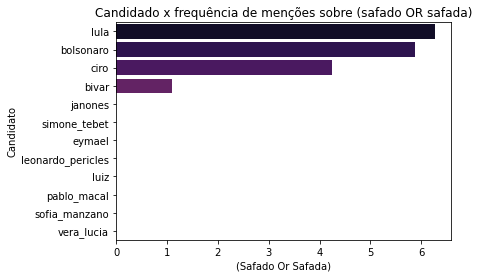

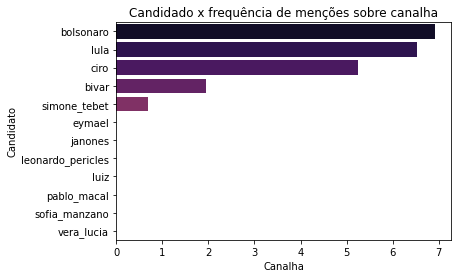

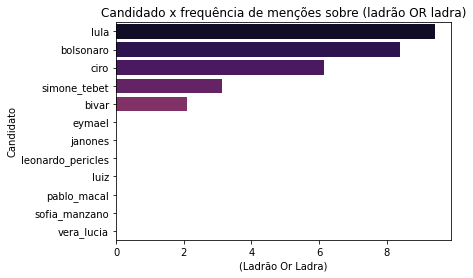

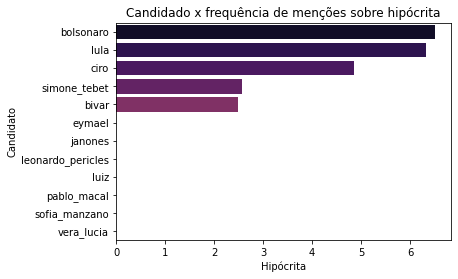

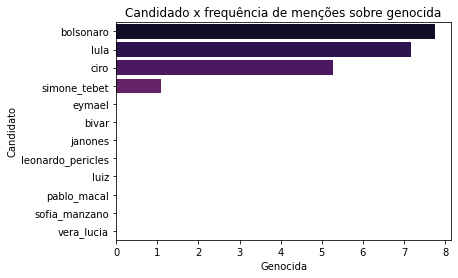

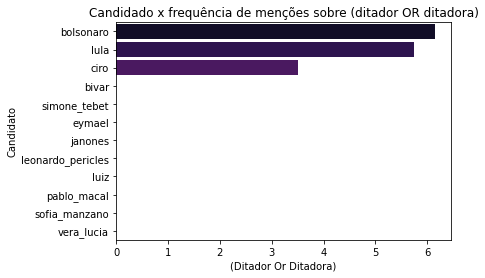

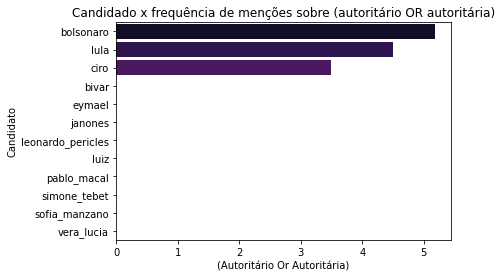

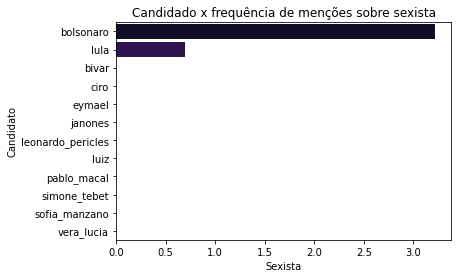

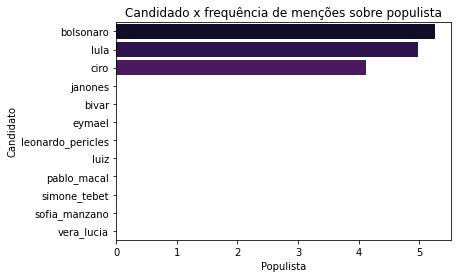

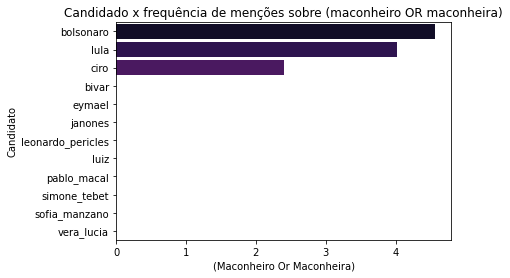

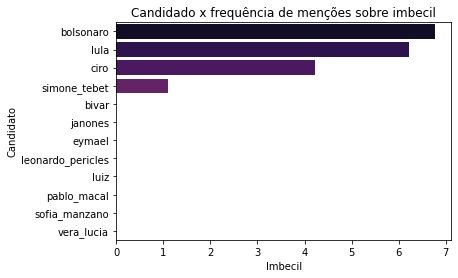

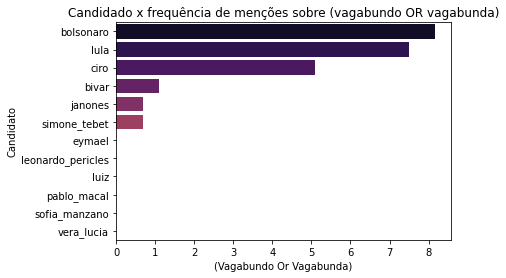

In [12]:
generate_barplots_by_topic(df, "candidato")

---

Mantendo o padrão analisado anteriormente, os candidatos Bolsonaro, Lula e Ciro aparecem com maior frequência em todos os tweets com comentários negativos. Vale ressaltar que comentários como corrupto/corrupta, vagabundo/vagabunda e ladrão/ladra abrangeram uma gama maior de candidatos que o normal.

---

## Quantidade de Tweets por dia da Semana

In [13]:
df1 = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

df1['data'] = pd.to_datetime(df1['data']).dt.day_name()
df1 = df1.groupby('data').sum()
df1

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto)
data,,,,,,
Friday,454,125,156,25,30,141
Monday,581,178,387,22,40,116
Saturday,385,207,129,13,28,121
Sunday,433,173,155,15,28,108
Thursday,410,153,142,28,29,119
Tuesday,361,169,182,39,19,120
Wednesday,280,115,201,44,16,123


In [14]:
dfp = df1.copy()
dfp['Total'] = dfp.apply(lambda x: x.sum(), axis = 1)

In [15]:
data_engajamento = dfp.groupby("data")['Total'].sum().sort_values(ascending=False)

In [16]:
data_engajamento

data
Monday       1324
Friday        931
Sunday        912
Tuesday       890
Saturday      883
Thursday      881
Wednesday     779
Name: Total, dtype: int64

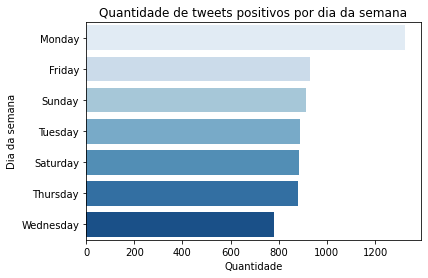

In [17]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets positivos por dia da semana")
plt.show()

In [18]:
df2 = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

df2['data'] = pd.to_datetime(df2['data']).dt.day_name()
df2 = df2.groupby('data').sum()
df2

,(corrupto OR corrupta),machista,racista,nazista,facista,(burro OR burra),comunista,socialista,anarquista,(alienado OR alienada),...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
data,,,,,,,,,,,,,,,,,,,,,
Friday,1015,28,34,80,26,659,434,98,4,63,...,3085,260,594,91,36,8,100,14,243,1307
Monday,813,17,41,52,32,412,307,83,0,51,...,2444,154,606,147,54,2,50,24,222,791
Saturday,681,22,27,50,24,399,318,63,2,28,...,2380,100,389,155,41,5,47,9,171,703
Sunday,826,17,15,47,33,469,282,97,2,44,...,2367,95,438,128,39,2,40,48,181,713
Thursday,932,25,53,121,16,399,388,234,3,62,...,2648,240,757,86,28,4,41,32,232,783
Tuesday,765,18,43,61,28,558,324,161,6,44,...,2309,139,602,118,45,3,56,21,189,623
Wednesday,794,29,31,54,30,478,299,135,0,55,...,2080,390,454,88,58,3,66,15,204,586


In [19]:
dfp = df2.copy()
dfp['Total'] = dfp.apply(lambda x: x.sum(), axis = 1)

In [20]:
data_engajamento = dfp.groupby("data")['Total'].sum().sort_values(ascending=False)

In [21]:
data_engajamento

data
Friday       10045
Thursday      8159
Monday        7135
Wednesday     7018
Tuesday       6977
Sunday        6963
Saturday      6403
Name: Total, dtype: int64

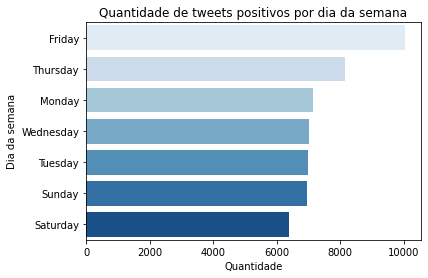

In [22]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets positivos por dia da semana")
plt.show()

In [23]:
df3 = df_all_folder("dados/ultimos_7_dias/").rename(columns={'level_1': "data"})

df3['data'] = pd.to_datetime(df3['data']).dt.day_name()
df3 = df3.groupby('data').sum()
df3

,ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
data,,,,,,
Friday,204,73,11,10,1316,221
Monday,286,63,11,16,1194,366
Saturday,241,175,5,10,1030,199
Sunday,231,74,5,16,1236,277
Thursday,216,30,9,23,1185,334
Tuesday,288,88,5,22,1124,264
Wednesday,281,145,2,17,1057,260


In [24]:
df = df1.join(df2).join(df3)
df

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto),(corrupto OR corrupta),machista,racista,nazista,...,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda),ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
data,,,,,,,,,,,,,,,,,,,,,
Friday,454,125,156,25,30,141,1015,28,34,80,...,100,14,243,1307,204,73,11,10,1316,221
Monday,581,178,387,22,40,116,813,17,41,52,...,50,24,222,791,286,63,11,16,1194,366
Saturday,385,207,129,13,28,121,681,22,27,50,...,47,9,171,703,241,175,5,10,1030,199
Sunday,433,173,155,15,28,108,826,17,15,47,...,40,48,181,713,231,74,5,16,1236,277
Thursday,410,153,142,28,29,119,932,25,53,121,...,41,32,232,783,216,30,9,23,1185,334
Tuesday,361,169,182,39,19,120,765,18,43,61,...,56,21,189,623,288,88,5,22,1124,264
Wednesday,280,115,201,44,16,123,794,29,31,54,...,66,15,204,586,281,145,2,17,1057,260


In [25]:
df['Total'] = df.apply(lambda x: x.sum(), axis = 1)

In [26]:
data_engajamento = df.groupby("data")['Total'].sum().sort_values(ascending=False)

In [27]:
data_engajamento

data
Friday       12811
Thursday     10837
Monday       10395
Sunday        9714
Tuesday       9658
Wednesday     9559
Saturday      8946
Name: Total, dtype: int64

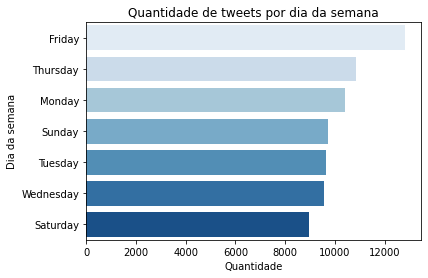

In [28]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets por dia da semana")
plt.show()

---

Levando em consideração os dias da semana, é notável que a sexta feira teve uma maior quantidade de tweets, seguida da quinta e segunda feira. Em relação aos comentários positivos, esses se concentram na segunda enquanto os negativos se concentram na sexta. 

---

## Adjetivos mais usados

In [29]:
df1 = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

df1 = df1.groupby('candidato').sum()
df1

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto)
candidato,,,,,,
bivar,5,3,1,1,0,15
bolsonaro,1135,510,433,67,125,422
ciro,130,106,231,31,19,67
eymael,0,1,0,1,0,0
janones,0,0,0,0,0,0
leonardo_pericles,0,0,0,0,0,0
luiz,1,0,0,0,0,0
lula,1522,481,570,85,45,338
pablo_macal,0,0,0,0,0,0


In [30]:
df2 = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

df2 = df2.groupby('candidato').sum()
df2

,(corrupto OR corrupta),machista,racista,nazista,facista,(burro OR burra),comunista,socialista,anarquista,(alienado OR alienada),...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
candidato,,,,,,,,,,,,,,,,,,,,,
bivar,31,0,0,0,8,8,1,4,0,0,...,8,12,0,1,0,0,0,0,1,3
bolsonaro,2359,106,164,314,106,1936,962,245,12,180,...,4370,672,2338,468,178,25,192,96,872,3522
ciro,413,15,33,30,21,228,138,27,1,16,...,467,128,197,33,33,0,61,11,68,161
eymael,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
janones,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,2
leonardo_pericles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
luiz,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lula,3009,33,47,121,54,1198,1245,592,4,150,...,12443,553,1301,310,90,2,146,56,497,1816
pablo_macal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dfm = df1.join(df2, how='outer')
dfm = dfm.groupby('candidato').sum()
dfm

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto),(corrupto OR corrupta),machista,racista,nazista,...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
candidato,,,,,,,,,,,,,,,,,,,,,
bivar,5,3,1,1,0,15,31,0,0,0,...,8,12,0,1,0,0,0,0,1,3
bolsonaro,1135,510,433,67,125,422,2359,106,164,314,...,4370,672,2338,468,178,25,192,96,872,3522
ciro,130,106,231,31,19,67,413,15,33,30,...,467,128,197,33,33,0,61,11,68,161
eymael,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
janones,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,2
leonardo_pericles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
luiz,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lula,1522,481,570,85,45,338,3009,33,47,121,...,12443,553,1301,310,90,2,146,56,497,1816
pablo_macal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
dfm = dfm.sum(axis = 0)

In [33]:
dfm = dfm.sort_values(ascending=False)

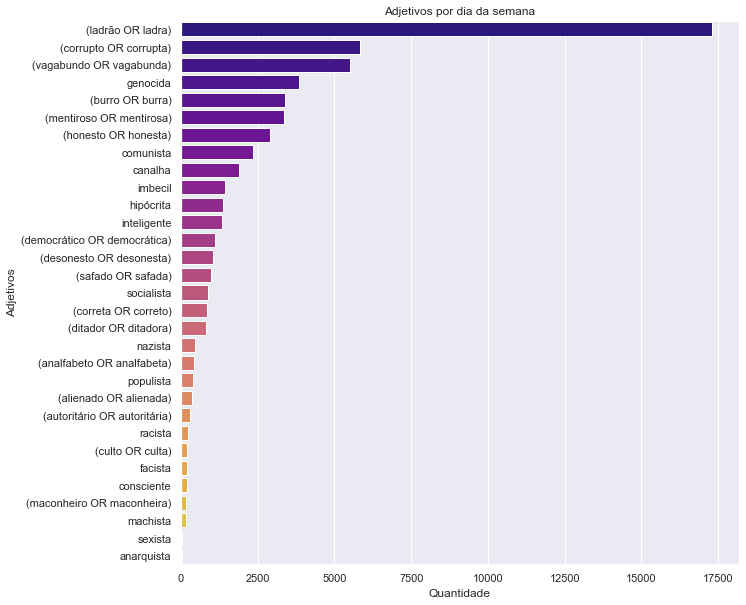

In [34]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = dfm.index, x = dfm.values, orient = 'h',palette = "plasma")
plt.xlabel("Quantidade")
plt.ylabel("Adjetivos")
plt.title("Adjetivos por dia da semana")
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

---

De maneira geral, adjetivos com conotação negativa foram mais usados do que aqueles com conotação positiva o pode induzir a uma hipótese de insatisfação da população para com os pré candidatos a presidencia da republica.

---

## Engajamento de tweets citando candidatos

In [35]:
# Carregando dados
import glob

def df_all_folder_100(path):
    
    all_files = glob.glob(path + "*_tweets.csv*")
    li = []
    
    print(all_files)
    for filename in all_files:
        print(filename)
        df = pd.read_csv(filename, index_col=0)
        li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace("_tweets.csv", "")
        x = x.replace("dados/ultimos_100_dias\\", "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [36]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [37]:
df = df.groupby('candidato').sum()
df

,level_1,id,retweets,replys,likes,author_id
candidato,,,,,,
Luiz_Felipe_d’Avila,153,2.766159e+19,59.0,74.0,553.0,1.755167e+19
bivar,4950,1.537552e+20,25.0,52.0,188.0,8.510328e+19
bolsonaro,4851,1.522273e+20,7.0,2.0,37.0,8.569569e+19
ciro,4950,1.537649e+20,2.0,12.0,29.0,8.644163e+19
eymael,4753,1.506458e+20,49.0,60.0,663.0,7.883192e+19
janones,4950,1.537357e+20,202.0,308.0,1961.0,8.466786e+19
leonardo_pericles,276,3.687649e+19,21.0,14.0,222.0,2.380861e+19
lula,4950,1.537650e+20,0.0,3.0,9.0,9.883779e+19
pablo_maçal,3,4.609113e+18,0.0,0.0,2.0,3.042290e+18


---

Contrário ao esperado, os principais pré-candidatos a presidência (Lula, Bolsonaro e Ciro) apresentam um número muito menor de curtidas, retweets e respostas em comparação a outros candidatos como André Janones e Vera Lúcia. Esse comportamento se deve ao fato de que esses candidatos são mencionados mais vezes em comparação aos outros. Tendo em vista que essa análise foi feita a partir dos ultimos 100 tweets, candidatos com um fluxo maior de menções tendem a ter um engajamento menor nesse tipo de amostra.

---

## Word cloud de tweets por candidatos

In [38]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\luish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [39]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [40]:
df['text'] = df.apply(lambda x: x['text'].lower().split(), axis = 1)

In [41]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(df, candidato):
    stop_words = [candidato, 'que', 'a', 'o', 'é', 'de', 'uma', 'não', 'eu', 'se', 'e', 'da', 'as', 'ok', 'com', 'umas', 'um', 'uns', 'pra', 'no', 'em', 'na', 'tem', 'para', 'pro']
    df = df[df['candidato'] == candidato]
    txt = []
    
    for text in df['text']:
        for word in text:
            if word not in stop_words:
                txt.append(word)

    wordcloud = WordCloud(max_font_size=100, width=800, height=600).generate_from_frequencies(Counter(txt))

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    plt.title("{}".format(candidato.title()))
    ax.set_axis_off()
    plt.imshow(wordcloud);
    plt.show()

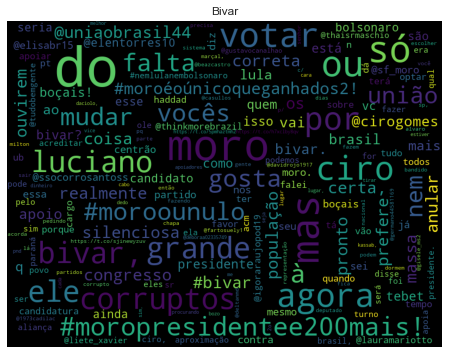

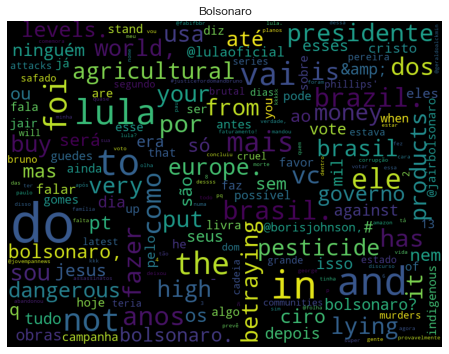

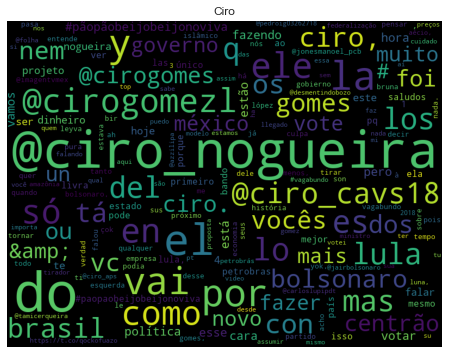

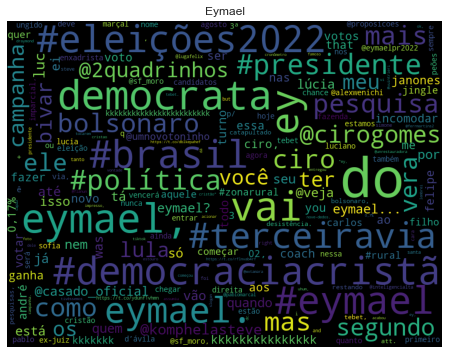

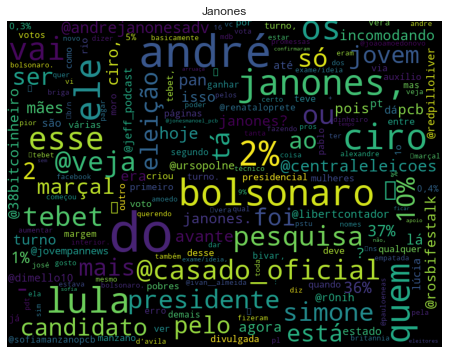

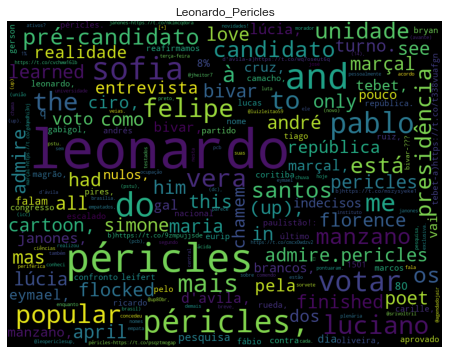

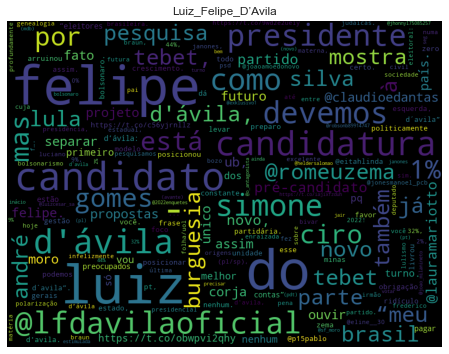

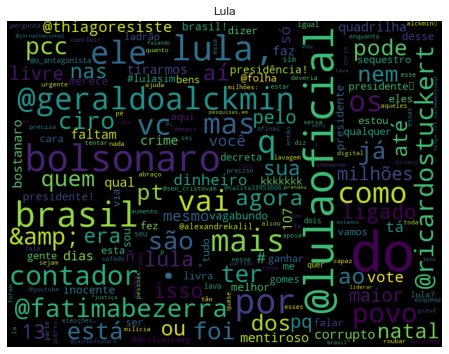

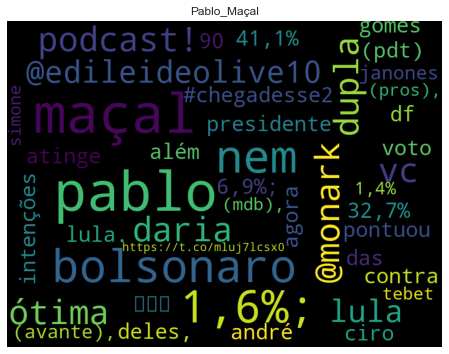

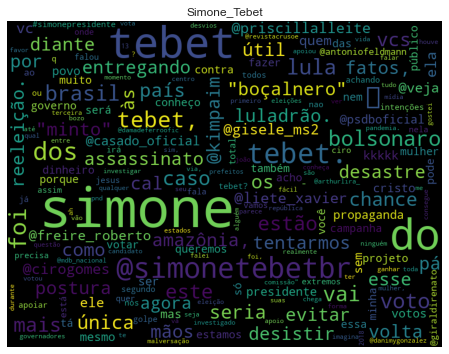

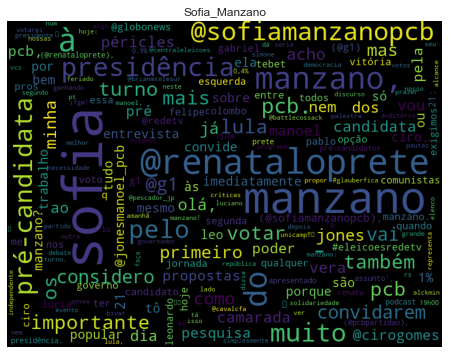

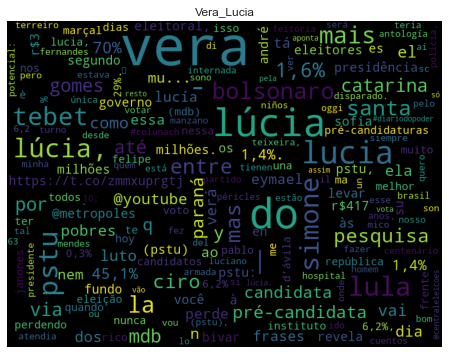

In [42]:
for candidato in df['candidato'].unique():
    generate_wordcloud(df, candidato)

In [43]:
df['text']

0      [@fartosuely1, @_afadamadrinha, @thinkmorebraz...
1              [@elentorres10, quem, confia, no, bivar?]
2      [moro, pode, escolher, cargo, para, concorrer,...
3      [@luzia74992679, acorda, bivar,, é, moro, para...
4      [bivar, pensa, que, todos, são, alienados,, mo...
                             ...                        
933    [assista, a, "lula, tem, 70%, entre, mais, pob...
934    [lula, tem, 70%, entre, mais, pobres, |, vera,...
935    [@luciiaa_vera, lucia, q, tengo, novio, shhhhh...
936    [arte, solidária, na, aperipê, tv, conversa, c...
937    [descubre, a, la, escritora, lucía, barcenilla...
Name: text, Length: 938, dtype: object

---

Word clouds é um étodo de visualização quantificada do número de ocorrência de palavras em determinado contexto. Nesse caso em específico, as word clouds ajudam a analisar melhor palavras e também hashtags recorrentes associadas a cada candidato mencionado.

---

## Mapa de candidatos

In [52]:
df = df_all_folder("dados/ultimos_100_tweets/", local=True)

In [53]:
df

,candidato,level_1,geo_full_name,geo_id,geo_x1,geo_x2,geo_y1,geo_y2
0,bivar,0,"Rurópolis, Brasil",4bc87f0150a9fde2,-4.678348,-55.897317,-3.722033,-54.69506
1,bivar,1,"Rio de Janeiro, Brasil",97bcdfca1a2dca59,-23.08302,-43.795449,-22.739823,-43.087707
2,bolsonaro,0,"São Paulo, Brasil",68e019afec7d0ba5,-24.008814,-46.826039,-23.356792,-46.365052
3,bolsonaro,1,"Parnamirim, Brasil",eb064d2fe812dac8,-5.984814,-35.309263,-5.851611,-35.119821
4,bolsonaro,2,"Gurupi, Brasil",7bdb0399a9e02f18,-11.962539,-49.180066,-11.353907,-48.569687
5,bolsonaro,3,"Rio de Janeiro, Brasil",97bcdfca1a2dca59,-23.08302,-43.795449,-22.739823,-43.087707
6,bolsonaro,4,"Foz do Iguaçu, Brasil",91f818a4abfb1d4d,-25.695489,-54.619501,-25.212313,-54.294691
7,ciro,0,"São Paulo, Brasil",68e019afec7d0ba5,-24.008814,-46.826039,-23.356792,-46.365052
8,ciro,1,"Teresina, Brasil",8bc4eeacf63235f9,-5.586602,-42.970679,-4.786034,-42.598967
9,eymael,0,"Brasília, Brasil",5722ff20ba67083b,-16.052405,-48.285982,-15.500103,-47.307264


In [54]:
df['geo_x'] = (df['geo_x1'] + df['geo_y1'])/2.0
df['geo_y'] = (df['geo_x2'] + df['geo_y2'])/2.0

In [55]:
!pip install folium

You should consider upgrading via the 'c:\users\luish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [56]:
import folium

def generate_map(df):


    map = folium.Map(location=[-28.87021, -49.45203], zoom_start=0)

    for idx, row in df.iterrows():
        folium.Marker([row['geo_x'], row['geo_y']], icon=folium.Icon(color='red', icon='home', prefix='fa')).add_to(map)

    return map

In [57]:
generate_map(df)

---

Outra gama de informações que pode ser retirada de um conjunto de tweets é a correlação entre pré candidato e a localização de onde um tweet foi feito. Analisando a tabela e também o mapa gerado, podemos analisar um pouco mais sobre a localização do eleitorado de cada candidato. Como exemplo, os candidatos Lula e Ciro apresentam localizações entre norte e nordeste enquanto Bolsonaro e Janones tem em maioria tweets feitos pelas regiões sudeste e centro-oeste.

---

## Origem do tweet por candidato

In [58]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [59]:
df = df.groupby('candidato')['source'].value_counts()
df

candidato            source                    
Luiz_Felipe_d’Avila  Twitter for Android            8
                     Twitter Web App                7
                     Twitter for iPhone             2
                     Echobox                        1
bivar                Twitter for Android           38
                     Twitter Web App               32
                     Twitter for iPhone            26
                     Bahia.ba                       1
                     Grabyo                         1
                     TweetDeck                      1
                     WordPress.com                  1
bolsonaro            Twitter for Android           65
                     Twitter Web App               18
                     Twitter for iPhone            15
                     WordPress.com                  1
ciro                 Twitter for Android           59
                     Twitter Web App               21
                     Twitter for i

---

A análise da origem de tweets permite verificar padrões em possíveis eleitores de cada pré candidato bem como a identificação de possíveis bots ou mensagens automáticas relacionadas a esses candidatos.

---